In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import networkx as nx
import seaborn as sns

from urllib.request import Request, urlopen
from urllib.parse import urlencode
from collections import Counter
from zipfile import ZipFile
from io import BytesIO
from xmltodict import parse

# Bar Charts

In [3]:
data = pd.read_csv('https://data.ibb.gov.tr/dataset/badd88ba-e0af-4f7d-bb7d-18dc913a7a65/resource/acc4c5d6-7654-48fb-a460-bffc6050f1b2/download/2019-2020-ismek-kesin-kaytl-kursiyer-verileri.csv',
                   encoding='iso8859-9',
                   sep=';')
data

,Donem,Egitim Durumu,Engel Durumu,Calisma Durumu,Alan,Program,Hak Edilen Belge Tipi,Kurs Merkezi,Kurs Merkezi İlcesi,Tercih Sebebi,Yas Araligi
0,2019-2020,Lisans,Engeli Olmayan,Ogrenci,Dil Egitimleri,Ingilizce A2 Seviyesi,Hak Etmedi,Dil Okulu,Sisli,"Meslek Edinmek, Meslegimde İlerlemek",20-30 Yas Arasi
1,2019-2020,Lise,Engeli Olmayan,Calismiyor,Spor,Fitness (Kadin),Ismek Sertifika,Silivri Spor Egitim Merkezi,Silivri,"Sanat,Muzik,Spor Vb. Yeteneklerimi Gelistirmek",20-30 Yas Arasi
2,2019-2020,Lisans,Engeli Olmayan,Ogrenci,Dil Egitimleri,Ingilizce A1 Seviyesi,Meb Sertifika,Tuzla Yayla Mahallesi,Tuzla,"Meslek Edinmek, Meslegimde İlerlemek",30-40 Yas Arasi
3,2019-2020,Lisans,Engeli Olmayan,Ogrenci,Spor,Crunch (Kadin),Hak Etmedi,Atasehir Kayisdagi,Atasehir,"Sanat,Muzik,Spor Vb. Yeteneklerimi Gelistirmek",20 Yas Alti
4,2019-2020,Lisans,Engeli Olmayan,Ogrenci,Spor,Stretching (Kadin),Hak Etmedi,Atasehir Kayisdagi,Atasehir,"Sanat,Muzik,Spor Vb. Yeteneklerimi Gelistirmek",20 Yas Alti
...,...,...,...,...,...,...,...,...,...,...,...
216760,2019-2020,Lisans,Engeli Olmayan,Calismiyor,Bilisim Teknolojileri,Powerpoint 2019 Kullanimi,Hak Etmedi,Uzaktan Egitim,Esenler,Sosyal Cevre Edinmek,40-50 Yas Arasi
216761,2019-2020,Lisans,Engeli Olmayan,Ogrenci,Grafik Ve Teknik Tasarim,Illustrator Cizim Uygulamalari 3,Ismek Sertifika,Uzaktan Egitim,Esenler,"Meslek Edinmek, Meslegimde İlerlemek",20-30 Yas Arasi
216762,2019-2020,Lisans,Engeli Olmayan,Ogrenci,Bilisim Teknolojileri,Egitimde Google Classroom Kullanimi,Hak Etmedi,Uzaktan Egitim,Esenler,"Meslek Edinmek, Meslegimde İlerlemek",20-30 Yas Arasi
216763,2019-2020,Lisans,Engeli Olmayan,Ogrenci,Bilisim Teknolojileri,Excel 2019 Kullanimi,Hak Etmedi,Uzaktan Egitim,Esenler,"Meslek Edinmek, Meslegimde İlerlemek",20-30 Yas Arasi


In [3]:
Counter(data['Calisma Durumu'])

Counter({'Ogrenci': 47904,
         'Calismiyor': 103132,
         'Calisiyor': 58390,
         'Emekli': 5752,
         'Bos': 1587})

<BarContainer object of 5 artists>

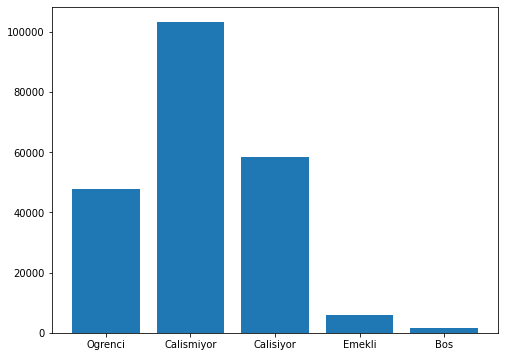

In [7]:
raw = Counter(data['Calisma Durumu'])
labels = list(raw.keys())
values = raw.values()
plt.bar(labels,values)

<BarContainer object of 10 artists>

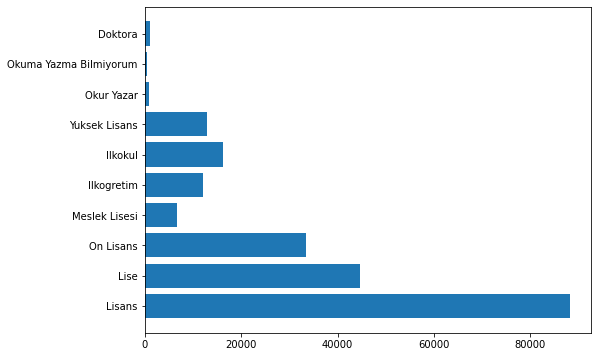

In [9]:
raw = Counter(data['Egitim Durumu'])
labels = list(raw.keys())
values = raw.values()
plt.barh(labels,values)

<BarContainer object of 10 artists>

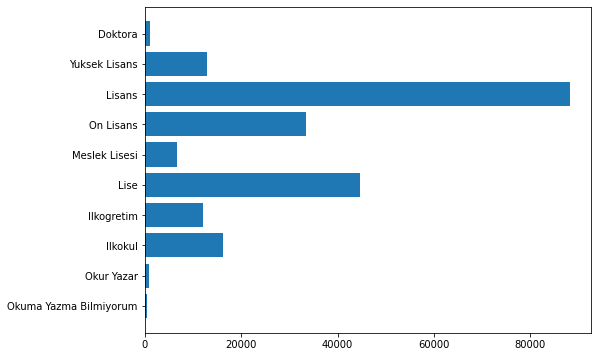

In [10]:
raw = Counter(data['Egitim Durumu'])

labels = ['Okuma Yazma Bilmiyorum', 'Okur Yazar', 'Ilkokul', 'Ilkogretim', 'Lise', 
          'Meslek Lisesi', 'On Lisans', 'Lisans', 'Yuksek Lisans', 'Doktora']

ys = [raw[label] for label in labels]

plt.barh(labels, ys)

In [18]:
def barChart(col):
    raw = Counter(data[col])
    ys = raw.values()
    ls = list(raw.keys())
    plt.barh(ls, ys)
    plt.show()

In [30]:
help(plt.barh)

Help on function barh in module matplotlib.pyplot:

barh(y, width, height=0.8, left=None, *, align='center', **kwargs)
    Make a horizontal bar plot.
    
    The bars are positioned at *y* with the given *align*\ment. Their
    dimensions are given by *width* and *height*. The horizontal baseline
    is *left* (default 0).
    
    Many parameters can take either a single value applying to all bars
    or a sequence of values, one for each bar.
    
    Parameters
    ----------
    y : float or array-like
        The y coordinates of the bars. See also *align* for the
        alignment of the bars to the coordinates.
    
    width : float or array-like
        The width(s) of the bars.
    
    height : float or array-like, default: 0.8
        The heights of the bars.
    
    left : float or array-like, default: 0
        The x coordinates of the left sides of the bars.
    
    align : {'center', 'edge'}, default: 'center'
        Alignment of the base to the *y* coordinates*:
 

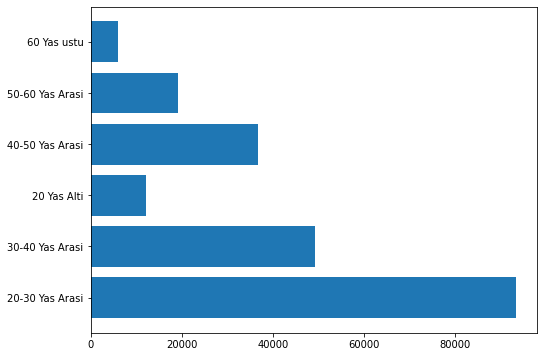

In [12]:
barChart('Yas Araligi')

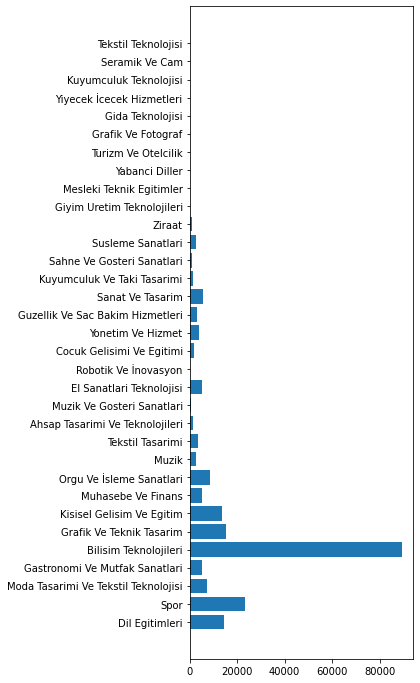

In [21]:
plt.rcParams['figure.figsize'] = 4,12
barChart('Alan')

# Pie Charts

In [22]:
def pieChart(col, ex=None):
    raw = Counter(data[col])
    ks = raw.keys()
    vs = 100*np.array(list(raw.values()))/sum(raw.values())
    plt.pie(vs, labels=ks, explode=ex)
    plt.show()

In [29]:
help(plt.pie)

Help on function pie in module matplotlib.pyplot:

pie(x, explode=None, labels=None, colors=None, autopct=None, pctdistance=0.6, shadow=False, labeldistance=1.1, startangle=0, radius=1, counterclock=True, wedgeprops=None, textprops=None, center=(0, 0), frame=False, rotatelabels=False, *, normalize=True, data=None)
    Plot a pie chart.
    
    Make a pie chart of array *x*.  The fractional area of each wedge is
    given by ``x/sum(x)``.  If ``sum(x) < 1``, then the values of *x* give
    the fractional area directly and the array will not be normalized. The
    resulting pie will have an empty wedge of size ``1 - sum(x)``.
    
    The wedges are plotted counterclockwise, by default starting from the
    x-axis.
    
    Parameters
    ----------
    x : 1D array-like
        The wedge sizes.
    
    explode : array-like, default: None
        If not *None*, is a ``len(x)`` array which specifies the fraction
        of the radius with which to offset each wedge.
    
    labels : li

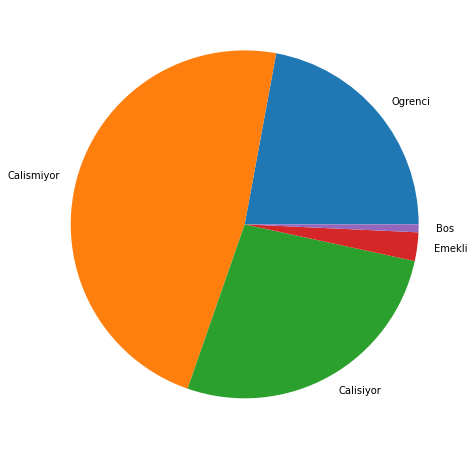

In [23]:
plt.rcParams['figure.figsize'] = 8,8
pieChart('Calisma Durumu')

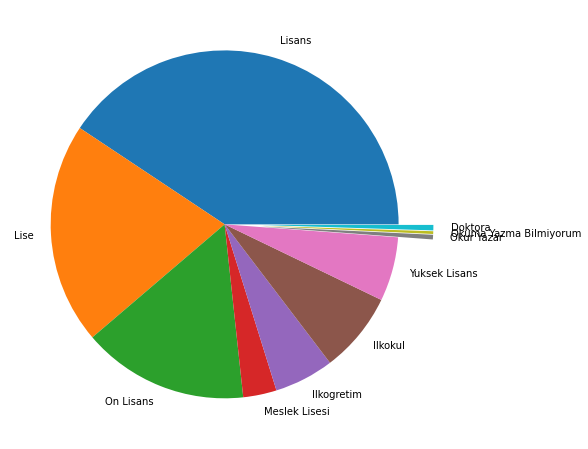

In [28]:
pieChart('Egitim Durumu',ex=[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.2,0.2])

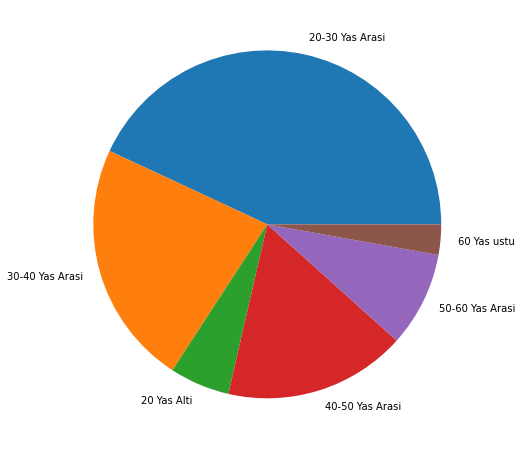

In [12]:
pieChart('Yas Araligi')

# Stacked Bar Charts

In [13]:
cross = pd.crosstab(data['Egitim Durumu'], data['Yas Araligi'])
cross

Yas Araligi,20 Yas Alti,20-30 Yas Arasi,30-40 Yas Arasi,40-50 Yas Arasi,50-60 Yas Arasi,60 Yas ustu
Egitim Durumu,,,,,,
Doktora,0,162,532,210,145,43
Ilkogretim,770,2049,2616,3634,2188,752
Ilkokul,1787,607,2568,6000,3953,1327
Lisans,1777,50408,20485,9984,4247,1232
Lise,5632,14020,9257,9125,5140,1472
Meslek Lisesi,974,2465,1213,1177,623,285
Okuma Yazma Bilmiyorum,15,70,103,130,167,66
Okur Yazar,74,196,123,196,218,129
On Lisans,1063,19396,7301,3843,1425,466


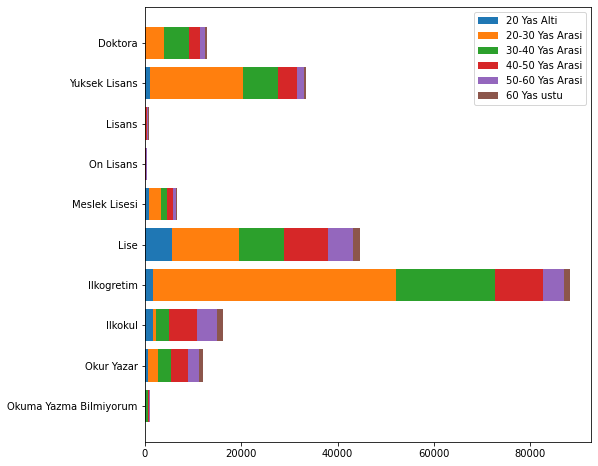

In [14]:
egitim = ['Okuma Yazma Bilmiyorum', 'Okur Yazar', 'Ilkokul', 'Ilkogretim', 'Lise', 
          'Meslek Lisesi', 'On Lisans', 'Lisans', 'Yuksek Lisans', 'Doktora']

yas = np.unique(data['Yas Araligi'])

fig, ax = plt.subplots()

hs = np.zeros(len(egitim))
for x in yas:
    ax.barh(egitim, cross[x],left=hs)
    hs = hs + cross[x]
    
plt.rcParams['figure.figsize'] = 15,8
ax.legend(yas)
plt.show()

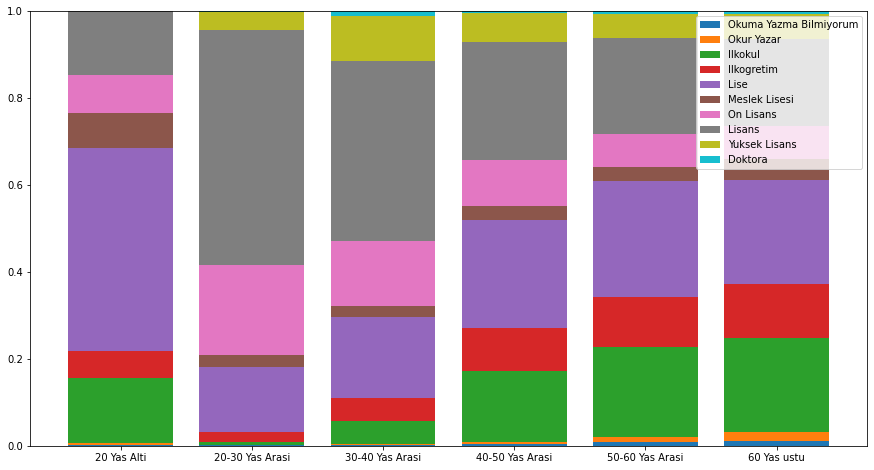

In [15]:
cross = pd.crosstab(data['Egitim Durumu'], data['Yas Araligi'])

for x in yas:
    cross[x] = cross[x]/sum(cross[x])

fig, ax = plt.subplots()

hs = np.zeros(len(yas))
for x in egitim:
    ys = cross.loc[x]
    ax.bar(yas, ys, bottom=hs)
    hs = hs + ys

plt.rcParams['legend.loc'] = 'upper right'
plt.rcParams['figure.figsize'] = 15,8
ax.legend(egitim)

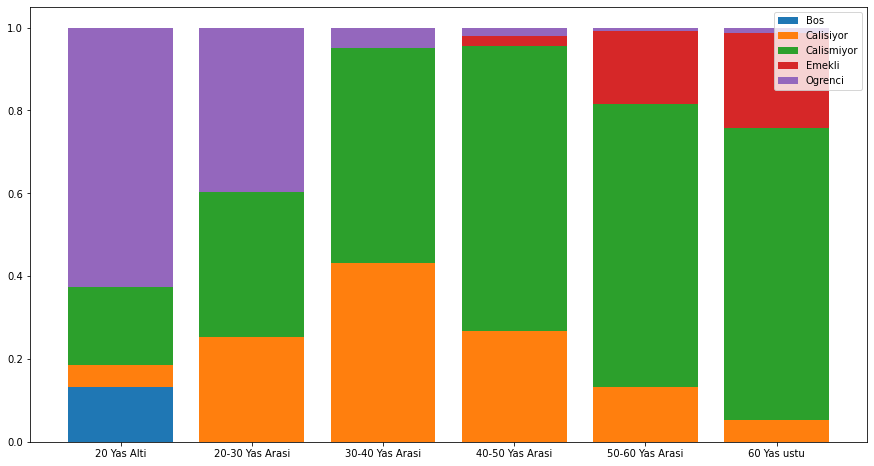

In [16]:
cross = pd.crosstab(data['Calisma Durumu'], data['Yas Araligi'])

for x in yas:
    cross[x] = cross[x]/sum(cross[x])

fig, ax = plt.subplots()

hs = np.zeros(len(yas))

calisma = np.unique(data['Calisma Durumu'])
for x in calisma:
    ys = cross.loc[x]
    ax.bar(yas, ys, bottom=hs)
    hs = hs + ys

plt.rcParams['legend.loc'] = 'upper right'
plt.rcParams['figure.figsize'] = 15,8
ax.legend(calisma)

# Line Plots

In [31]:
def queryWorldBank(series, name):
    base = 'https://api.worldbank.org/v2/en/indicator/'
    with urlopen(f'{base}/{series}?downloadformat=xml') as url:
        zf = ZipFile(BytesIO(url.read()))
    name = zf.filelist[0]
    raw = parse(zf.open(name).read().decode('utf8'))
    res = []
    years = []
    for x in raw['Root']['data']['record']:
        y = x['field']
        try:
            res.append({'country': y[0]['#text'], 
                         name: float(y[3]['#text'])})
            years.append(int(y[2]['#text']))
        except:
            None
    return pd.DataFrame(res, index=years)

In [32]:
mortality = queryWorldBank('SH.DYN.MORT','child mortality')
mortality.columns = ['country','child mortality']
mortality

,country,child mortality
1990,Africa Eastern and Southern,165.801528
1991,Africa Eastern and Southern,164.128976
1992,Africa Eastern and Southern,162.511815
1993,Africa Eastern and Southern,161.204106
1994,Africa Eastern and Southern,161.556769
...,...,...
2016,Zimbabwe,58.700000
2017,Zimbabwe,57.000000
2018,Zimbabwe,54.800000
2019,Zimbabwe,54.200000


In [33]:
GDP = queryWorldBank('ny.gdp.pcap.cd','GDP')
GDP.columns = ['country','GDP per capita']
GDP

,country,GDP per capita
1986,Aruba,6472.398709
1987,Aruba,7885.158927
1988,Aruba,9765.909207
1989,Aruba,11392.269150
1990,Aruba,12306.717679
...,...,...
2016,Zimbabwe,1464.588957
2017,Zimbabwe,1235.189032
2018,Zimbabwe,1254.642265
2019,Zimbabwe,1316.740657


In [34]:
population = queryWorldBank('sp.urb.totl.in.zs','population')
population.columns = ['country','population']
population

,country,population
1960,Aruba,50.776
1961,Aruba,50.761
1962,Aruba,50.746
1963,Aruba,50.730
1964,Aruba,50.715
...,...,...
2016,Zimbabwe,32.296
2017,Zimbabwe,32.237
2018,Zimbabwe,32.209
2019,Zimbabwe,32.210


<AxesSubplot:>

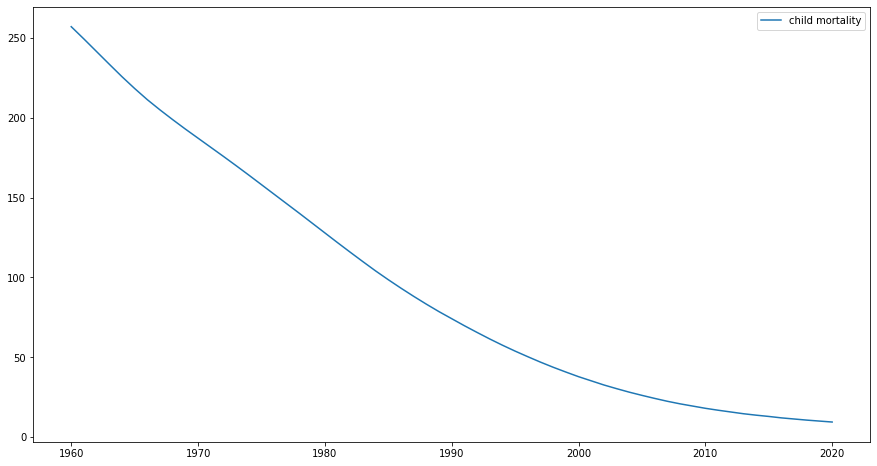

In [35]:
plt.rcParams['figure.figsize'] = 15,8
mortality[mortality['country']=='Turkey'].plot()

<AxesSubplot:>

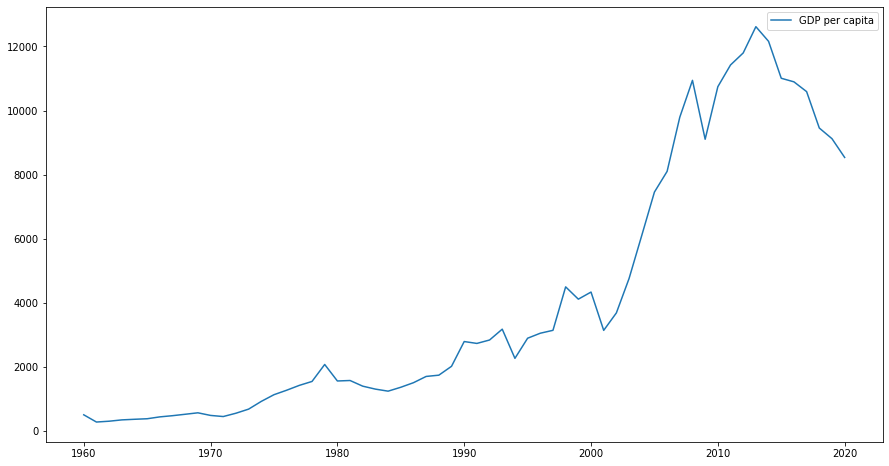

In [36]:
GDP[GDP['country']=='Turkey'].plot()

<AxesSubplot:>

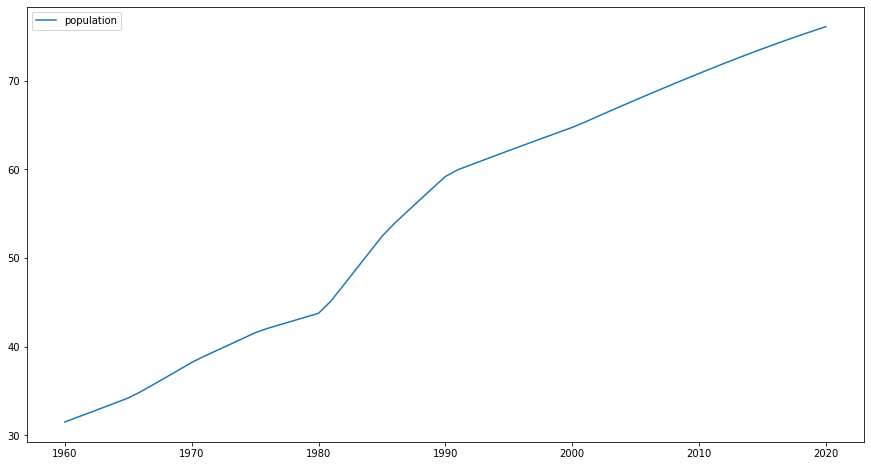

In [37]:
population[population['country']=='Turkey'].plot()

# Scatter Plots

In [39]:
xs = GDP.groupby('country').mean()
ys = mortality.groupby('country').mean()
ss = population.groupby('country').mean()
res = xs.join([ys,ss],how='inner')
res

,GDP per capita,child mortality,population
country,,,
Afghanistan,287.200843,191.232787,18.611754
Africa Eastern and Southern,770.670039,112.016765,24.961239
Africa Western and Central,783.224301,146.090185,30.454531
Albania,2338.374773,33.683721,40.444164
Algeria,2166.696854,105.527869,52.609213
...,...,...,...
West Bank and Gaza,2218.664958,42.341304,65.180525
World,4738.761547,63.941935,43.730633
"Yemen, Rep.",831.660353,178.177049,22.010869


Text(0.5, 0, 'GDP (log)')

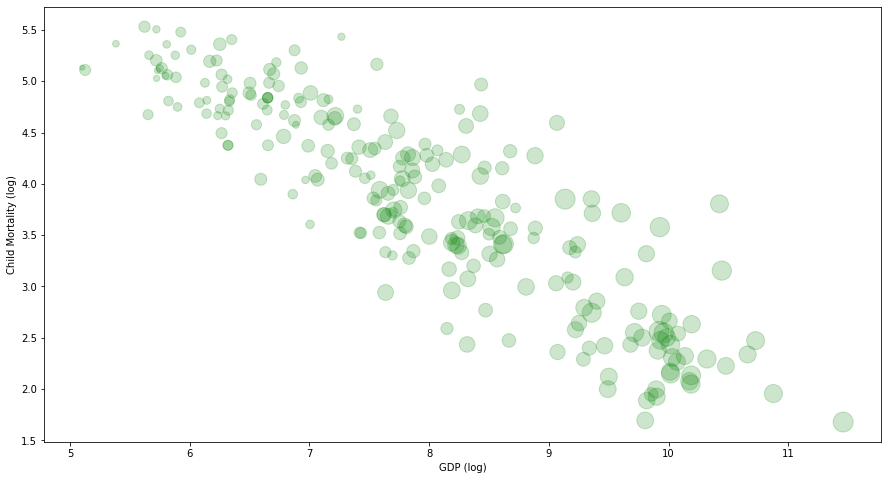

In [45]:
plt.scatter(np.log(res.iloc[:,0]), np.log(res.iloc[:,1]), s=res.iloc[:,2]*4, c='green', alpha=0.2)
plt.ylabel('Child Mortality (log)')
plt.xlabel('GDP (log)')

<AxesSubplot:xlabel='GDP per capita', ylabel='child mortality'>

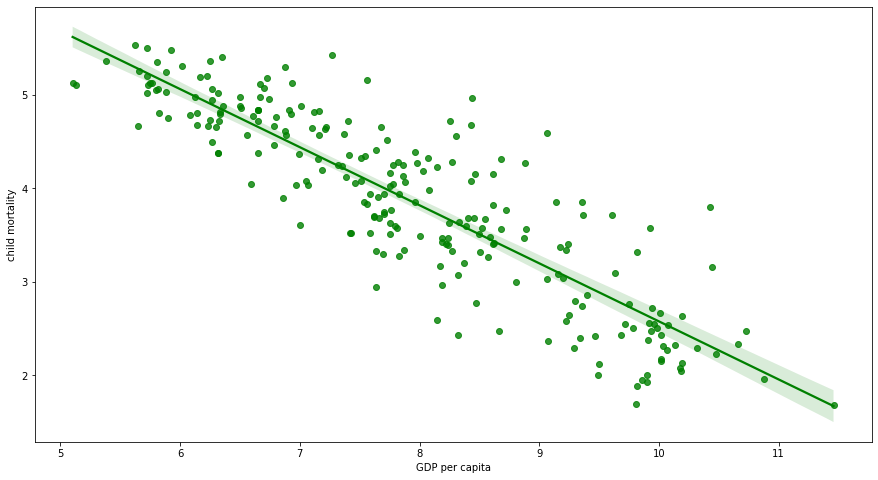

In [34]:
sns.regplot(x=np.log(res.iloc[:,0]), y=np.log(res.iloc[:,1]), color='green')

# Network Plots

In [46]:
with urlopen('https://programminghistorian.org/assets/exploring-and-analyzing-network-data-with-python/quakers_nodelist.csv') as url:
    nodes = pd.read_csv(url)
    
nodes

,Name,Historical Significance,Gender,Birthdate,Deathdate,ID
0,Joseph Wyeth,religious writer,male,1663,1731,10013191
1,Alexander Skene of Newtyle,local politician and author,male,1621,1694,10011149
2,James Logan,colonial official and scholar,male,1674,1751,10007567
3,Dorcas Erbery,Quaker preacher,female,1656,1659,10003983
4,Lilias Skene,Quaker preacher and poet,male,1626,1697,10011152
...,...,...,...,...,...,...
114,Thomas Ellwood,religious controversialist,male,1639,1713,10003945
115,William Simpson,Quaker preacher,male,1627,1671,10011114
116,Samuel Bownas,Quaker minister and writer,male,1677,1753,10001390
117,John Perrot,Quaker schismatic,male,1555,1665,10009584


In [47]:
women = set(nodes[nodes['Gender'] == 'female']['Name'])
women

{'Alice Curwen',
 'Anne Camm',
 'Anne Conway Viscountess Conway and Killultagh',
 'Dorcas Erbery',
 'Dorothy Waugh',
 'Elizabeth Hooten',
 'Elizabeth Leavens',
 'Grace Chamber',
 'Hannah Stranger',
 'Isabel Yeamans',
 'Jane Sowle',
 'Katharine Evans',
 'Lydia Lancaster',
 'Margaret Fell',
 'Martha Simmonds',
 'Mary Fisher',
 'Mary Penington',
 'Mary Pennyman',
 'Mary Prince',
 'Rebecca Travers',
 'Sarah Cheevers',
 'Sarah Gibbons'}

In [48]:
with urlopen('https://programminghistorian.org/assets/exploring-and-analyzing-network-data-with-python/quakers_edgelist.csv') as url:
    edges = pd.read_csv(url)
    
edges.columns = ['source','target']
edges.dropna(inplace=True)
edges

,source,target
0,George Keith,Robert Barclay
1,George Keith,Benjamin Furly
2,George Keith,Anne Conway Viscountess Conway and Killultagh
3,George Keith,Franciscus Mercurius van Helmont
4,George Keith,William Penn
...,...,...
169,Thomas Curtis,William Simpson
170,Thomas Curtis,John Story
171,Alexander Parker,Sir Charles Wager
172,John Story,Thomas Ellwood


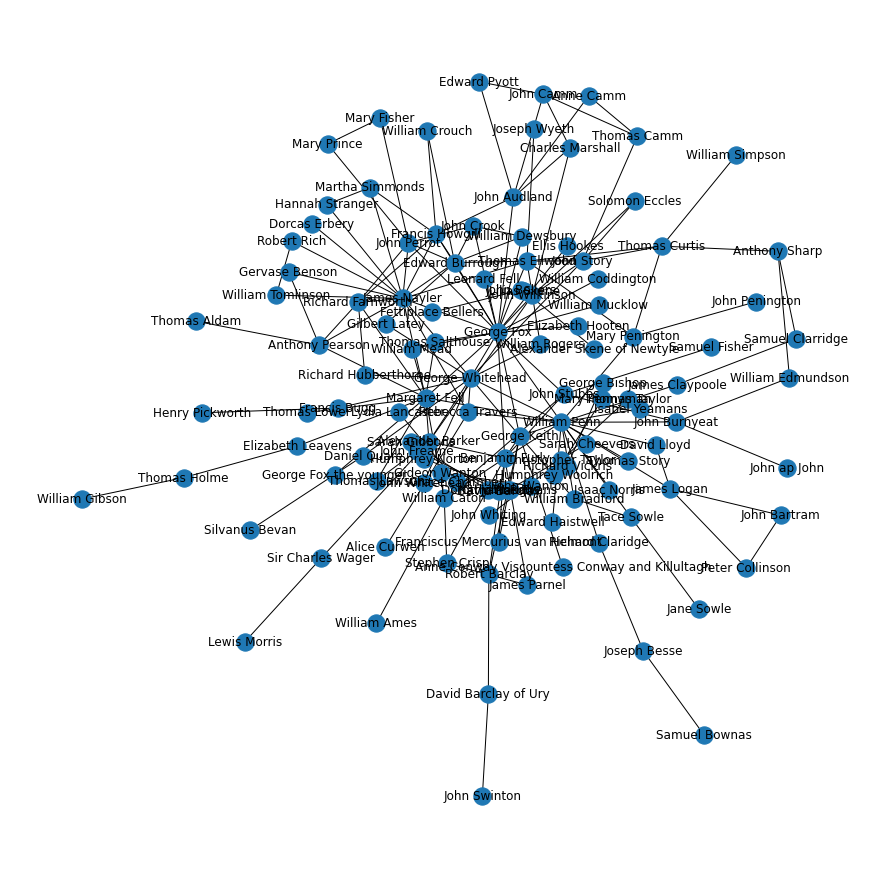

In [52]:
plt.rcParams['figure.figsize'] = 12,12

graph = nx.from_pandas_edgelist(pd.DataFrame(edges))
nx.draw_kamada_kawai(graph,with_labels=True)

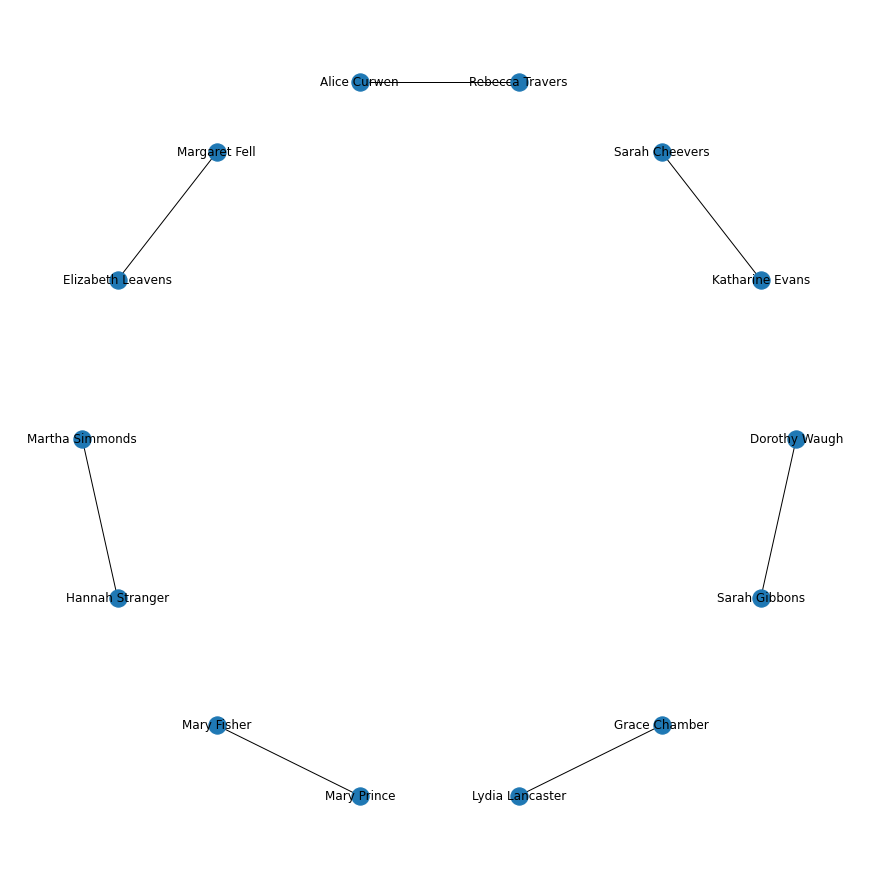

In [49]:
res = edges[[set(t).issubset(women) for s,t in edges.transpose().items()]]

plt.rcParams['figure.figsize'] = 12,12

graph = nx.from_pandas_edgelist(pd.DataFrame(res))
nx.draw_shell(graph,with_labels=True)

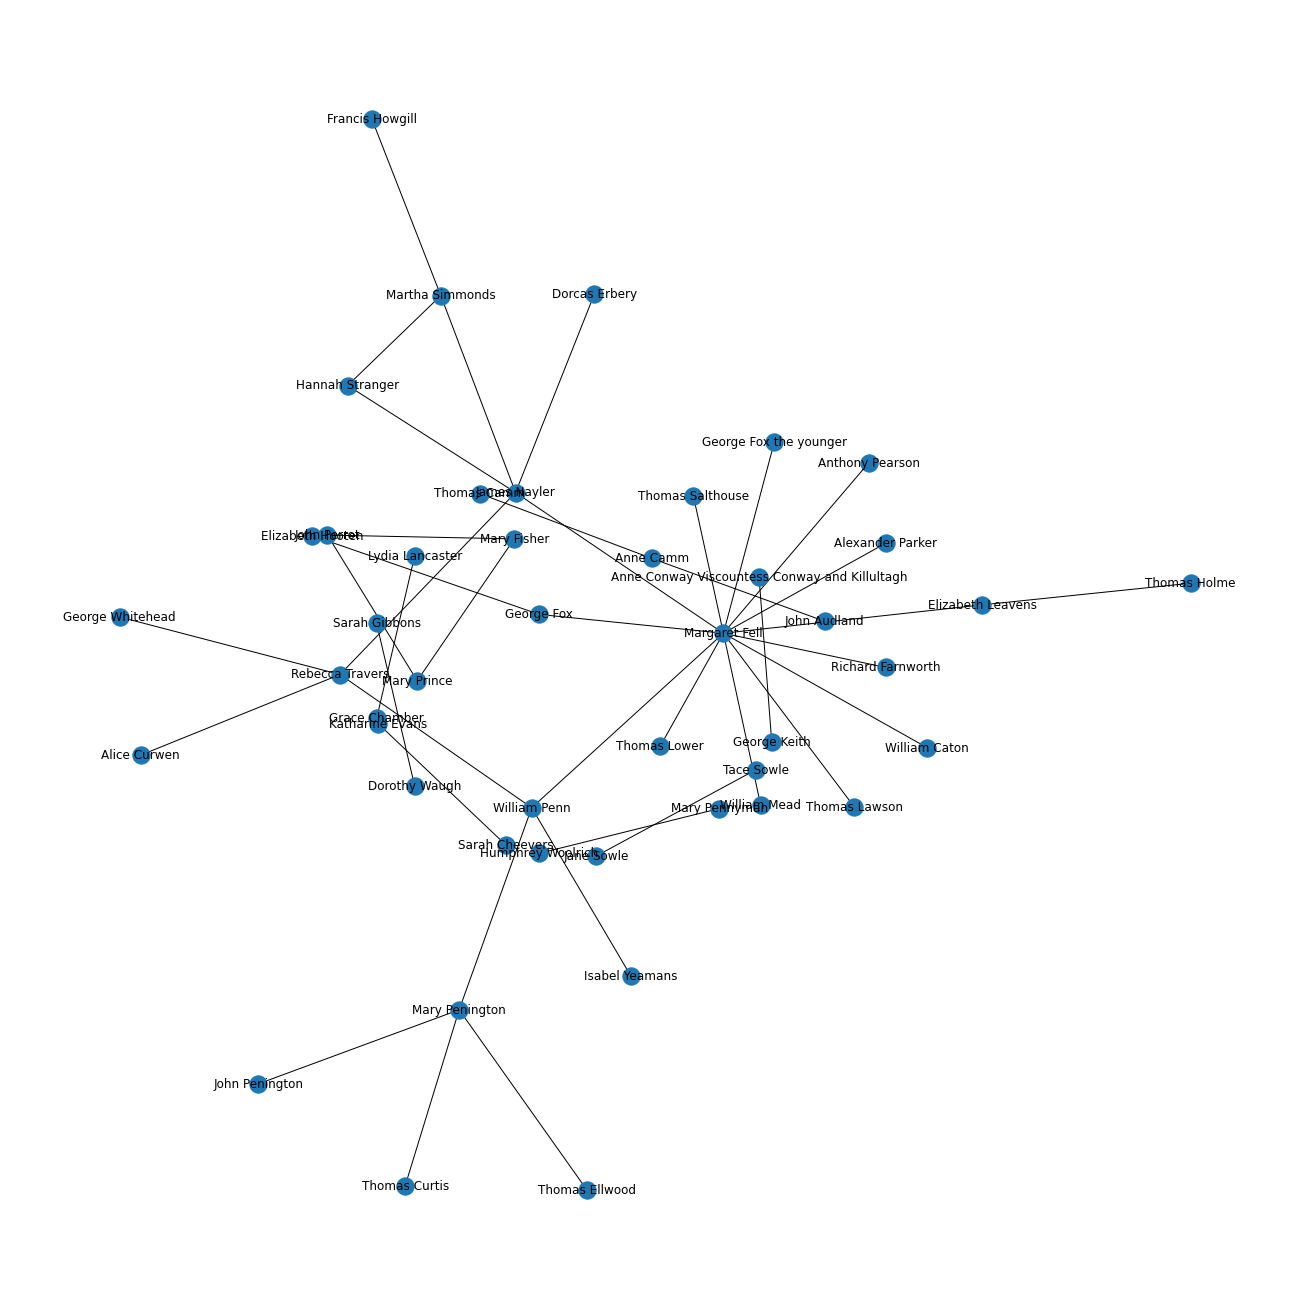

In [80]:
res = edges[[(t[0] in women) or (t[1] in women) for s,t in edges.transpose().items()]]

plt.rcParams['figure.figsize'] = 18,18

graph = nx.from_pandas_edgelist(pd.DataFrame(res))
nx.draw_kamada_kawai(graph,with_labels=True)

# Sports Data

Data came from [Sports-Statistics.com](https://sports-statistics.com/) where you can find data on [NBA](https://sports-statistics.com/sports-data/nba-basketball-datasets-csv-files/) and other [sports](https://sports-statistics.com/sports-data/sports-data-sets-for-data-modeling-visualization-predictions-machine-learning/).

In [57]:
with ZipFile('data/nba.zip','r') as file:
    data = pd.read_csv(file.open(file.filelist[0]))
    
data.head(10)

,URL,GameType,Location,Date,Time,WinningTeam,Quarter,SecLeft,AwayTeam,AwayPlay,...,EnterGame,LeaveGame,TurnoverPlayer,TurnoverType,TurnoverCause,TurnoverCauser,JumpballAwayPlayer,JumpballHomePlayer,JumpballPoss,Unnamed: 40
0,/boxscores/201910220TOR.html,regular,Scotiabank Arena Toronto Canada,October 22 2019,8:00 PM,TOR,1,720,NOP,Jump ball: D. Favors vs. M. Gasol (L. Ball gai...,...,NaN,NaN,NaN,NaN,NaN,NaN,D. Favors - favorde01,M. Gasol - gasolma01,L. Ball - balllo01,NaN
1,/boxscores/201910220TOR.html,regular,Scotiabank Arena Toronto Canada,October 22 2019,8:00 PM,TOR,1,708,NOP,L. Ball misses 2-pt jump shot from 11 ft,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,/boxscores/201910220TOR.html,regular,Scotiabank Arena Toronto Canada,October 22 2019,8:00 PM,TOR,1,707,NOP,Offensive rebound by D. Favors,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,/boxscores/201910220TOR.html,regular,Scotiabank Arena Toronto Canada,October 22 2019,8:00 PM,TOR,1,707,NOP,D. Favors makes 2-pt layup at rim,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,/boxscores/201910220TOR.html,regular,Scotiabank Arena Toronto Canada,October 22 2019,8:00 PM,TOR,1,689,NOP,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,/boxscores/201910220TOR.html,regular,Scotiabank Arena Toronto Canada,October 22 2019,8:00 PM,TOR,1,685,NOP,Defensive rebound by J. Redick,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,/boxscores/201910220TOR.html,regular,Scotiabank Arena Toronto Canada,October 22 2019,8:00 PM,TOR,1,676,NOP,J. Holiday misses 2-pt layup from 8 ft,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,/boxscores/201910220TOR.html,regular,Scotiabank Arena Toronto Canada,October 22 2019,8:00 PM,TOR,1,675,NOP,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,/boxscores/201910220TOR.html,regular,Scotiabank Arena Toronto Canada,October 22 2019,8:00 PM,TOR,1,671,NOP,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,/boxscores/201910220TOR.html,regular,Scotiabank Arena Toronto Canada,October 22 2019,8:00 PM,TOR,1,668,NOP,Defensive rebound by D. Favors,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
subset = data[(data['Date']=='October 22 2019') & (data['WinningTeam']=='TOR')]
subset

,URL,GameType,Location,Date,Time,WinningTeam,Quarter,SecLeft,AwayTeam,AwayPlay,...,EnterGame,LeaveGame,TurnoverPlayer,TurnoverType,TurnoverCause,TurnoverCauser,JumpballAwayPlayer,JumpballHomePlayer,JumpballPoss,Unnamed: 40
0,/boxscores/201910220TOR.html,regular,Scotiabank Arena Toronto Canada,October 22 2019,8:00 PM,TOR,1,720,NOP,Jump ball: D. Favors vs. M. Gasol (L. Ball gai...,...,NaN,NaN,NaN,NaN,NaN,NaN,D. Favors - favorde01,M. Gasol - gasolma01,L. Ball - balllo01,NaN
1,/boxscores/201910220TOR.html,regular,Scotiabank Arena Toronto Canada,October 22 2019,8:00 PM,TOR,1,708,NOP,L. Ball misses 2-pt jump shot from 11 ft,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,/boxscores/201910220TOR.html,regular,Scotiabank Arena Toronto Canada,October 22 2019,8:00 PM,TOR,1,707,NOP,Offensive rebound by D. Favors,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,/boxscores/201910220TOR.html,regular,Scotiabank Arena Toronto Canada,October 22 2019,8:00 PM,TOR,1,707,NOP,D. Favors makes 2-pt layup at rim,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,/boxscores/201910220TOR.html,regular,Scotiabank Arena Toronto Canada,October 22 2019,8:00 PM,TOR,1,689,NOP,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560,/boxscores/201910220TOR.html,regular,Scotiabank Arena Toronto Canada,October 22 2019,8:00 PM,TOR,5,10,NOP,J. Holiday misses 3-pt jump shot from 27 ft,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
561,/boxscores/201910220TOR.html,regular,Scotiabank Arena Toronto Canada,October 22 2019,8:00 PM,TOR,5,8,NOP,Offensive rebound by N. Melli,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
562,/boxscores/201910220TOR.html,regular,Scotiabank Arena Toronto Canada,October 22 2019,8:00 PM,TOR,5,6,NOP,Turnover by J. Redick (step out of bounds),...,NaN,NaN,J. Redick - redicjj01,step out of bounds,NaN,NaN,NaN,NaN,NaN,NaN
563,/boxscores/201910220TOR.html,regular,Scotiabank Arena Toronto Canada,October 22 2019,8:00 PM,TOR,5,0,NOP,End of 1st overtime,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
subset.columns

Index(['URL', 'GameType', 'Location', 'Date', 'Time', 'WinningTeam', 'Quarter',
       'SecLeft', 'AwayTeam', 'AwayPlay', 'AwayScore', 'HomeTeam', 'HomePlay',
       'HomeScore', 'Shooter', 'ShotType', 'ShotOutcome', 'ShotDist',
       'Assister', 'Blocker', 'FoulType', 'Fouler', 'Fouled', 'Rebounder',
       'ReboundType', 'ViolationPlayer', 'ViolationType', 'TimeoutTeam',
       'FreeThrowShooter', 'FreeThrowOutcome', 'FreeThrowNum', 'EnterGame',
       'LeaveGame', 'TurnoverPlayer', 'TurnoverType', 'TurnoverCause',
       'TurnoverCauser', 'JumpballAwayPlayer', 'JumpballHomePlayer',
       'JumpballPoss', 'Unnamed: 40'],
      dtype='object')

<BarContainer object of 20 artists>

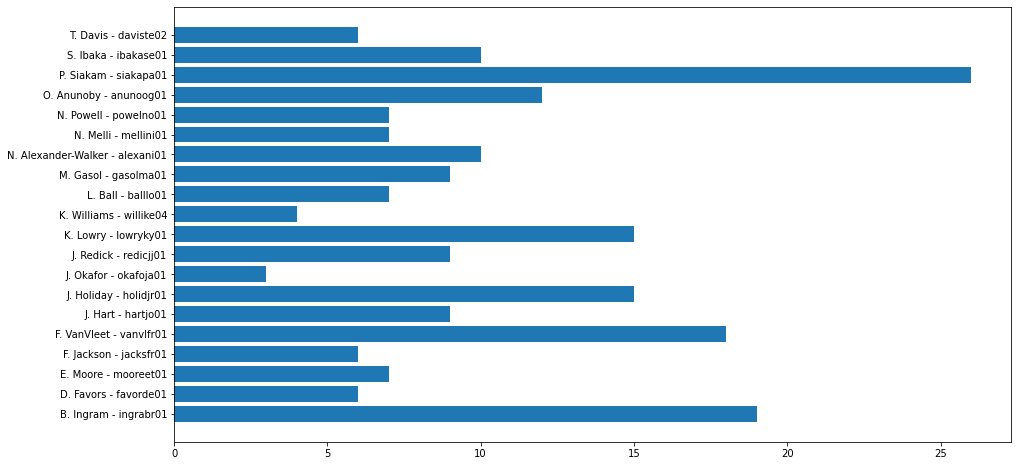

In [142]:
tmp = subset.groupby('Shooter').size()
plt.barh(tmp.index,tmp)

The following data comes from [Football Data](https://www.football-data.org/).

In [37]:
with open('data/football.json') as f:
    res = json.load(f)

In [182]:
res['matches'][10]

{'id': 328836,
 'season': {'id': 734,
  'startDate': '2021-06-26',
  'endDate': '2022-05-22',
  'currentMatchday': 7},
 'utcDate': '2021-07-07T16:00:00Z',
 'status': 'FINISHED',
 'matchday': 1,
 'stage': 'QUALIFICATION_ROUND_1',
 'group': None,
 'lastUpdated': '2022-03-19T00:20:03Z',
 'odds': {'msg': 'Activate Odds-Package in User-Panel to retrieve odds.'},
 'score': {'winner': 'AWAY_TEAM',
  'duration': 'REGULAR',
  'fullTime': {'homeTeam': 1, 'awayTeam': 2},
  'halfTime': {'homeTeam': 1, 'awayTeam': 1},
  'extraTime': {'homeTeam': None, 'awayTeam': None},
  'penalties': {'homeTeam': None, 'awayTeam': None}},
 'homeTeam': {'id': 7482, 'name': 'FC Dinamo Tbilisi'},
 'awayTeam': {'id': 7493, 'name': 'Neftçi PFK'},
 'referees': []}

In [185]:
[{'home': x['homeTeam']['name'],
  'away': x['awayTeam']['name'],
  'score': x['score']['fullTime']} for x in res['matches']]

[{'home': 'HB Tórshavn',
  'away': "Inter Club d'Escaldes",
  'score': {'homeTeam': 0, 'awayTeam': 1}},
 {'home': 'SS Folgore/Falciano',
  'away': 'FC Prishtina',
  'score': {'homeTeam': 0, 'awayTeam': 2}},
 {'home': 'FC Prishtina',
  'away': "Inter Club d'Escaldes",
  'score': {'homeTeam': 2, 'awayTeam': 0}},
 {'home': 'FC Flora',
  'away': 'Hibernians FC',
  'score': {'homeTeam': 2, 'awayTeam': 0}},
 {'home': 'Ferencvárosi TC',
  'away': 'FC Prishtina',
  'score': {'homeTeam': 3, 'awayTeam': 0}},
 {'home': 'Helsingin JK',
  'away': 'FK Budućnost Podgorica',
  'score': {'homeTeam': 3, 'awayTeam': 1}},
 {'home': 'FC CFR 1907 Cluj',
  'away': 'FK Borac Banja Luka',
  'score': {'homeTeam': 3, 'awayTeam': 1}},
 {'home': 'FK Žalgiris Vilnius',
  'away': 'Linfield FC',
  'score': {'homeTeam': 3, 'awayTeam': 1}},
 {'home': 'CS Fola Esch',
  'away': 'Lincoln Red Imps FC',
  'score': {'homeTeam': 2, 'awayTeam': 2}},
 {'home': 'KF Shkëndija 79',
  'away': 'NŠ Mura',
  'score': {'homeTeam': 0, '

In [61]:
set([1,2]).issupset(set([1,2,3]))

AttributeError: 'set' object has no attribute 'issupset'